In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 13.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(1)
    tf.config.experimental_connect_to_cluster(tpu)
    print(2)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    print(3)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print(4)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")

except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")


D0911 18:39:21.449976575      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0911 18:39:21.450003790      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0911 18:39:21.450008067      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0911 18:39:21.450011290      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0911 18:39:21.450014276      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0911 18:39:21.450017617      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0911 18:39:21.450020707      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0911 18:39:21.

1
2
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


3
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


4
Running on TPU: 
Batch Size: 32


In [ ]:
import pandas as pd
test=pd.read_csv("/kaggle/input/quora-question-pairs/test.csv")
train=pd.read_csv("/kaggle/input/quora-question-pairs/train.csv.zip")

In [ ]:
import re
from string import punctuation
def clean_dataframe_train(train):
  def text_to_wordlist(text):
      text = re.sub(r"[^A-Za-z0-9]", " ", text)
      text = re.sub(r"what's", "", text)
      text = re.sub(r"What's", "", text)
      text = re.sub(r"\'s", " ", text)
      text = re.sub(r"\'ve", " have ", text)
      text = re.sub(r"can't", "cannot ", text)
      text = re.sub(r"n't", " not ", text)
      text = re.sub(r"I'm", "I am", text)
      text = re.sub(r" m ", " am ", text)
      text = re.sub(r"\'re", " are ", text)
      text = re.sub(r"\'d", " would ", text)
      text = re.sub(r"\'ll", " will ", text)
      text = re.sub(r"60k", " 60000 ", text)
      text = re.sub(r" e g ", " eg ", text)
      text = re.sub(r" b g ", " bg ", text)
      text = re.sub(r"\0s", "0", text)
      text = re.sub(r" 9 11 ", "911", text)
      text = re.sub(r"e-mail", "email", text)
      text = re.sub(r"\s{2,}"," ",text)
      text = re.sub(r"quikly", "quickly", text)
      text = re.sub(r" usa ", " America ", text)
      text = re.sub(r" USA ", " America ", text)
      text = re.sub(r" u s ", " America ", text)
      text = re.sub(r" uk ", " England ", text)
      text = re.sub(r" UK ", " England ", text)
      text = re.sub(r"india", "India", text)
      text = re.sub(r"switzerland", "Switzerland", text)
      text = re.sub(r"china", "China", text)
      text = re.sub(r"chinese", "Chinese", text)
      text = re.sub(r"imrovement", "improvement", text)
      text = re.sub(r"intially", "initially", text)
      text = re.sub(r"quora", "Quora", text)
      text = re.sub(r" dms ", "direct messages ", text)
      text = re.sub(r"demonitization", "demonetization", text)
      text = re.sub(r"actived", "active", text)
      text = re.sub(r"kms", " kilometers ", text)
      text = re.sub(r"KMs", " kilometers ", text)
      text = re.sub(r" cs ", " computer science ", text)
      text = re.sub(r" upvotes ", " up votes ", text)
      text = re.sub(r" iPhone ", " phone ", text)
      text = re.sub(r"\0rs ", " rs ", text)
      text = re.sub(r"calender", "calendar", text)
      text = re.sub(r"ios", "operating system", text)
      text = re.sub(r"gps","GPS",text)
      text = re.sub(r"gst","GST", text)
      text = re.sub(r"programing", "programming", text)
      text = re.sub(r"bestfriend", "best friend", text)
      text = re.sub(r"dna", "DNA", text)
      text = re.sub(r"III", "3", text)
      text = re.sub(r"the US", "America", text)
      text = re.sub(r"Astrology", "astrology", text)
      text = re.sub(r"Method", "method", text)
      text = re.sub(r"banglore", "Banglore", text)
      text = re.sub(r" J K ", " JK ", text)
      text = ''.join([c for c in text if c not in punctuation])
      return text
  def process_questions(question_list, questions, question_list_name, dataframe):
      for question in questions:
        question_list.append(text_to_wordlist(str(question)))
        if len(question_list) % 100000 == 0:
          progress = len(question_list)/len(dataframe) * 100
          print("{} is {}% complete.".format(question_list_name, round(progress, 1)))

  print("1st inside")
  train_question1 = []
  process_questions(train_question1, train.question1, 'train_question1', train)

  train_question2 = []
  process_questions(train_question2, train.question2, 'train_question2', train)

  train["question1"] = train_question1
  train["question2"] = train_question2

  return train

In [ ]:
train=clean_dataframe_train(train)
test=clean_dataframe_train(test)

1st inside
train_question1 is 24.7% complete.
train_question1 is 49.5% complete.
train_question1 is 74.2% complete.
train_question1 is 98.9% complete.
train_question2 is 24.7% complete.
train_question2 is 49.5% complete.
train_question2 is 74.2% complete.
train_question2 is 98.9% complete.
1st inside
train_question1 is 4.3% complete.
train_question1 is 8.5% complete.
train_question1 is 12.8% complete.
train_question1 is 17.1% complete.
train_question1 is 21.3% complete.
train_question1 is 25.6% complete.
train_question1 is 29.8% complete.
train_question1 is 34.1% complete.
train_question1 is 38.4% complete.
train_question1 is 42.6% complete.
train_question1 is 46.9% complete.
train_question1 is 51.2% complete.
train_question1 is 55.4% complete.
train_question1 is 59.7% complete.
train_question1 is 63.9% complete.
train_question1 is 68.2% complete.
train_question1 is 72.5% complete.
train_question1 is 76.7% complete.
train_question1 is 81.0% complete.
train_question1 is 85.3% complete.


In [ ]:
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor Koh i Noor Diamond,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely How can I solve it,Find the remainder when math 23 24 math is div...,0
4,4,9,10,Which one dissolve in water quickly sugar salt...,Which fish would survive in salt water,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death,Is it true that there is life after death,1
404287,404287,537928,537929,What is one coin,What s this coin,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
from transformers import AutoTokenizer,TFBertModel
model_check='bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_check)
def encode_text(text, tokenizer):
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=50,#gui code
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import numpy as np
train = train.sample(400000)
train1 = train.iloc[:int(400000*0.80),:]
val = train.iloc[int(400000*0.80):,:]
X1_train = encode_text(train1['question1'].tolist(), tokenizer)
X2_train = encode_text(train1['question2'].tolist(), tokenizer)
X1_val = encode_text(val['question1'].tolist(), tokenizer)
X2_val = encode_text(val['question2'].tolist(), tokenizer)
y_train = train1['is_duplicate'].values
y_val = val['is_duplicate'].values

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input,GlobalAveragePooling1D,Dense
def euclidean_distance(featsA,featsB):
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))
from tensorflow.keras.models import Model
import tensorflow as tf
with strategy.scope():
    transformer_model = TFBertModel.from_pretrained(model_check)

    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state

    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    e_dist = euclidean_distance(embedding1,embedding2)

    x = Dense(512, activation='relu')(e_dist)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
for layer in model.layers[:5]:
    layer.trainable = False

In [ ]:
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])),
                    y_train, batch_size=32, epochs=5,
                    validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),
                    )

Epoch 1/5


2023-09-11 18:50:48.521801: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-11 18:50:49.767044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


10000/10000 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.6711

2023-09-11 19:02:08.645022: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-11 19:02:08.856495: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


10000/10000 [==============================] - 760s 66ms/step - loss: 0.5678 - accuracy: 0.6711 - val_loss: 0.4829 - val_accuracy: 0.7789
Epoch 2/5
10000/10000 [==============================] - 651s 65ms/step - loss: 0.4323 - accuracy: 0.8036 - val_loss: 0.3709 - val_accuracy: 0.8443
Epoch 3/5
10000/10000 [==============================] - 649s 65ms/step - loss: 0.3285 - accuracy: 0.8613 - val_loss: 0.3106 - val_accuracy: 0.8685
Epoch 4/5
10000/10000 [==============================] - 655s 66ms/step - loss: 0.2529 - accuracy: 0.8989 - val_loss: 0.2929 - val_accuracy: 0.8780
Epoch 5/5
10000/10000 [==============================] - 656s 66ms/step - loss: 0.1942 - accuracy: 0.9262 - val_loss: 0.2914 - val_accuracy: 0.8823


In [ ]:
eval_results = model.evaluate(
    x=[np.asarray(X1_val['input_ids']), np.asarray(X1_val['attention_masks']), np.asarray(X2_val['input_ids']), np.asarray(X2_val['attention_masks'])],
    y=y_val,
    batch_size=32
)

loss, accuracy = eval_results

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Loss: 0.1942
Accuracy: 0.9262


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask1 (InputLayer)   [(None, None)]       0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask2 (InputLayer)   [(None, None)]       0           []                               
                                                                                              

In [ ]:
model.save_weights("bertnlp.h5")

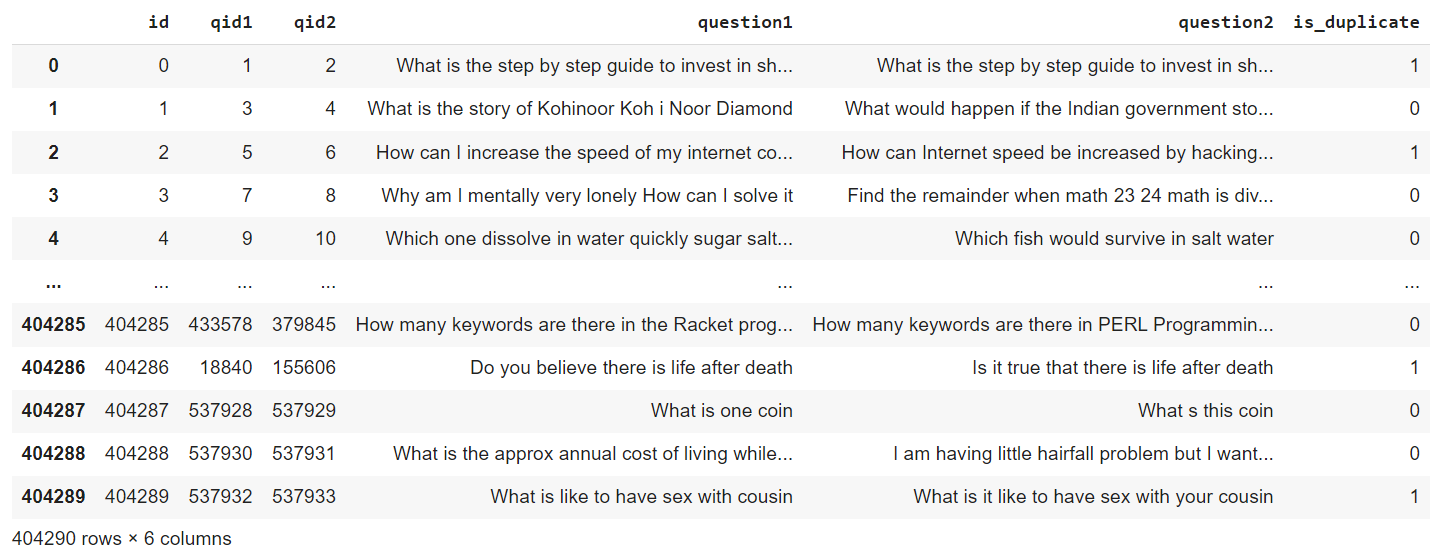

In [ ]:
test

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel

model_name = "bertnlp.h5"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=128)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

question1 = input("Enter the first question: ")
question2 = input("Enter the second question: ")

embedding1 = get_bert_embeddings(question1)
embedding2 = get_bert_embeddings(question2)

cosine_sim = cosine_similarity([embedding1], [embedding2])

threshold = 0.8

if cosine_sim > threshold:
    print("These questions are similar.")
else:
    print("These questions are dissimilar.")

Enter the first question: How do i do my taxes?
Enter the second question: How can taxes be filed?
These questions are similar.


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

model_name = "bertnlp.h5"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=128)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

question1 = input("Enter the first question: ")
question2 = input("Enter the second question: ")

embedding1 = get_bert_embeddings(question1)
embedding2 = get_bert_embeddings(question2)

cosine_sim = cosine_similarity([embedding1], [embedding2])

threshold = 0.8

if cosine_sim > threshold:
    print("These questions are similar.")
else:
    print("These questions are dissimilar.")

Enter the first question: How to file taxes?
Enter the second question: How to comb my hair?
These questions are dissimilar.


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

model_name = "bertnlp.h5"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=128)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

question1 = input("Enter the first question: ")
question2 = input("Enter the second question: ")

embedding1 = get_bert_embeddings(question1)
embedding2 = get_bert_embeddings(question2)

cosine_sim = cosine_similarity([embedding1], [embedding2])

threshold = 0.8

if cosine_sim > threshold:
    print("These questions are similar.")
else:
    print("These questions are dissimilar.")

Enter the first question: How to file taxes?
Enter the second question: How old should one be to be eligible for filing taxes?
These questions are dissimilar.


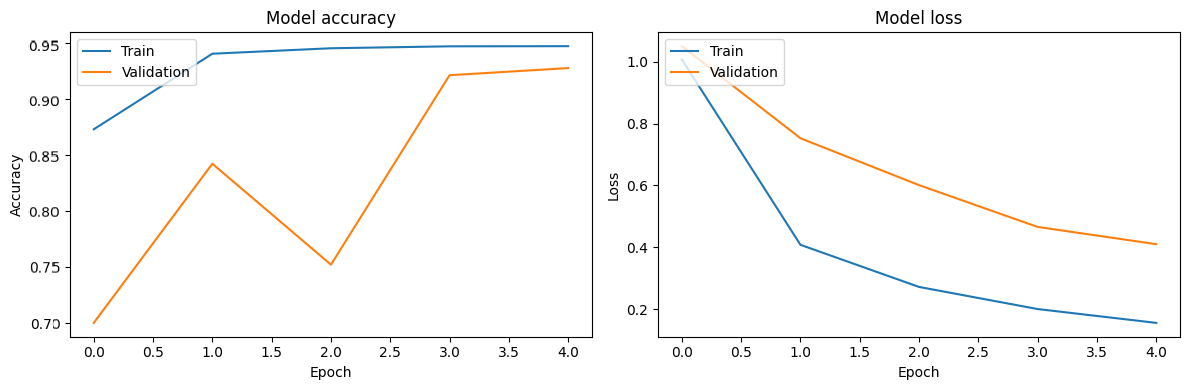

In [3]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
